### Train the Model and get the Accuracy and Loss curves - On Generated Data , see the usage of fit_generator() method.

### Create new images and try the same model to be trained


In [21]:
from keras import backend as k
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D, Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.datasets import mnist,cifar10
from keras.optimizers import RMSprop, Adam, SGD
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
%matplotlib inline

In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
import numpy as np
NUM_TO_AUGMENT = 5

# Repititive steps as last time for training the model

OPTIMIZER = RMSprop()
NB_EPOCHS = 1   # decreasing the number of epochs to reduce the time for MLP, also for the RMSPROP and ADAM optimizers
SPLIT_PARAM = 0.2
NB_CLASSES = 10
VERBOSE =1
BATCH_SIZE = 128
DROPOUT_RATE = 0.25
NB_ROW, NB_COLS = 32, 32
NB_CHANNELS = 3
INPUT_SHAPE = (NB_ROW,NB_COLS, NB_CHANNELS)

# load dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Y_train = np_utils.to_categorical(Y_train, NB_CLASSES)
# Y_test = np_utils.to_categorical(Y_test, NB_CLASSES)

# augumenting
print("Augumenting training set images ... ")
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

Augumenting training set images ... 


### Train the Model and get the Accuracy and Loss curves - On Generated Data , see the usage of fit_generator() method.

In [ ]:
xtas, ytas = [], []
for i in range(X_train.shape[0]):
    num_aug = 0
    x = X_train[i] # (3, 32, 32)
    x = x.reshape((1,) + x.shape) # (1, 3, 32, 32)
    for x_aug in datagen.flow(x, batch_size=1,
    save_to_dir='/Users/tkmacl9/Desktop/FastAIDLCourse/nbs/KerasDeepLearning/preview', save_prefix='cifar', save_format='jpeg'):
    if num_aug >= NUM_TO_AUGMENT:
        break
    xtas.append(x_aug[0])
    num_aug += 1

In [23]:
model = Sequential()
# 1st layer of the DNN
model.add(Conv2D(32, (3,3), padding='same', input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(DROPOUT_RATE))

# 2nd layer of the DNN
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(DROPOUT_RATE))

# Final dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
__________

In [24]:
#fit the dataget
datagen.fit(X_train)

In [25]:
print(X_train.shape[0])

50000


In [ ]:
# train
model.compile(optimizer=OPTIMIZER, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(datagen.flow(X_train, Y_train, 
                               batch_size=32) ,steps_per_epoch=len(X_train) ,epochs=NB_EPOCHS, verbose=VERBOSE)

In [ ]:
score = model.evaluate(X_test, Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

## The model was trained on AWS GPU instance and the weights were saved along with the model which can be loaded and used for prediction in the next steps (This model is the one trained on previous step and not with the extra images)

In [27]:
import numpy as np
import scipy.misc
from keras.models import model_from_json
from keras.optimizers import SGD

#read the pre-trained model architecture and model weights
model_architecture_file = '/Users/tkmacl9/Desktop/FastAIDLCourse/nbs/KerasDeepLearning/cifar_10_deep_cnn.json'
model_weight_file = '/Users/tkmacl9/Desktop/FastAIDLCourse/nbs/KerasDeepLearning/cifar_10_deep_cnn_weights.h5'

#load the model weights and the model architectures
model = model_from_json(open(model_architecture_file).read())
model.load_weights(model_weight_file)


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
__________

In [50]:
# read and resize the images - the 
base_location = '/Users/tkmacl9/Desktop/FastAIDLCourse/nbs/KerasDeepLearning/'
img_names = [base_location+'cat_standing.jpg', base_location+'dog.jpg', base_location+'horse_1.jpg']
imgs = [scipy.misc.imresize(scipy.misc.imread(img_name), (32,32)).astype('float32') for img_name in img_names]
#imgs = [np.transpose(scipy.misc.imresize(scipy.misc.imread(img_name), (32,32)), (1,0,2)).astype('float32') for img_name in img_names]
imgs = np.array(imgs) / 255

#train
optim=SGD()
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

#predict
predictions = model.predict_classes(imgs)
print(predictions)

3/3 [==============================] - 0s
[5 3 7]


### This shows the scipy.misc transformations on the images

In [45]:
# just reading the images and printing their shapes
imgs_tmp = [scipy.misc.imread(img_name) for img_name in img_names]
print(imgs_tmp[0].shape)
print(imgs_tmp[1].shape)
imgs_tmp_1 = [scipy.misc.imresize(scipy.misc.imread(img_name), (32,32)) for img_name in img_names]
print(imgs_tmp_1[0].shape)
print(imgs_tmp_1[1].shape)
imgs = [np.transpose(scipy.misc.imresize(scipy.misc.imread(img_name), (32,32)), (1,0,2)).astype('float32') for img_name in img_names]
print(imgs[0].shape)
print(imgs[1].shape)

(778, 1000, 3)
(240, 427, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


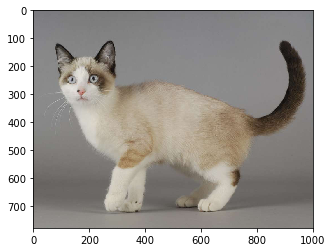

In [44]:
plt.imshow(imgs_tmp[0])

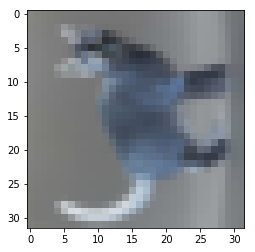

In [43]:
plt.imshow(imgs[0])